In [1]:
from modern_algorithm_trading.coingecko import *
import pandas as pd
from modern_algorithm_trading.coingecko.references import COINGECKO_FILEDS, COINGECKO_DAYS_OPTIONS
from modern_algorithm_trading.coingecko.coin_applications import *
from universal_timeseries_transformer import TimeseriesMatrix
from canonical_transformer.morphisms import *

In [2]:
c = Crypto(tickers_crypto=['ETH', 'SUI', 'SOL'], ticker_fiat='BTC', days='1D')

In [3]:
c.df

Transformed timeseries to <class 'pandas._libs.tslibs.timestamps.Timestamp'> index
Transformed timeseries to <class 'pandas._libs.tslibs.timestamps.Timestamp'> index
Transformed timeseries to <class 'pandas._libs.tslibs.timestamps.Timestamp'> index


,BTC_ETH,BTC_SUI,BTC_SOL
datetime,,,
2025-08-21 06:46:46.296000+00:00,0.037817,0.000031,0.001645
2025-08-21 06:50:14.593000+00:00,0.037811,0.000031,0.001645
2025-08-21 06:52:09.704000+00:00,0.037811,0.000031,0.001645
2025-08-21 06:52:38.793000+00:00,0.037811,0.000031,0.001644
2025-08-21 06:55:53.377000+00:00,0.037811,0.000031,0.001644
...,...,...,...
2025-08-22 06:37:30.791000+00:00,0.038031,0.000031,0.001625
2025-08-22 06:41:11.738000+00:00,0.038031,0.000031,0.001624
2025-08-22 06:41:12.509000+00:00,0.038031,0.000030,0.001624


In [12]:
map_df_to_csv(c.df, file_folder='./data/dataset-crypto', file_name='dataset-crypto-prices-tickersETH SUI SOL_BTC-days1D-save20250822.csv')



| Saved csv to ./data/dataset-crypto/dataset-crypto-prices-tickersETH SUI SOL_BTC-days1D-save20250822.csv
index_ref: DatetimeIndex(['2025-08-21 06:46:46.296000+00:00',
               '2025-08-21 06:50:14.593000+00:00',
               '2025-08-21 06:52:09.704000+00:00',
               '2025-08-21 06:52:38.793000+00:00',
               '2025-08-21 06:55:53.377000+00:00',
               '2025-08-21 06:56:02.580000+00:00',
               '2025-08-21 06:56:06.386000+00:00',
               '2025-08-21 07:00:46.080000+00:00',
               '2025-08-21 07:01:22.395000+00:00',
               '2025-08-21 07:02:13.850000+00:00',
               ...
               '2025-08-22 06:30:08.235000+00:00',
               '2025-08-22 06:31:50.699000+00:00',
               '2025-08-22 06:31:54.885000+00:00',
               '2025-08-22 06:36:41.323000+00:00',
               '2025-08-22 06:37:23.928000+00:00',
               '2025-08-22 06:37:30.791000+00:00',
               '2025-08-22 06:41:11.738000+00:00

ValueError: Failed to validate isomorphism between df and df_csv: False

In [4]:
c.cumreturns

,cumreturn: BTC_ETH,cumreturn: BTC_SUI,cumreturn: BTC_SOL
datetime,,,
2025-08-21 06:46:46.296000+00:00,0.000000,0.000000,0.000000
2025-08-21 06:50:14.593000+00:00,-0.015920,0.000000,0.000000
2025-08-21 06:52:09.704000+00:00,-0.015920,0.007458,0.000000
2025-08-21 06:52:38.793000+00:00,-0.015920,0.007458,-0.081537
2025-08-21 06:55:53.377000+00:00,-0.015920,-0.041469,-0.081537
...,...,...,...
2025-08-22 06:37:30.791000+00:00,0.565007,-1.214423,-1.216970
2025-08-22 06:41:11.738000+00:00,0.565007,-1.214423,-1.290900
2025-08-22 06:41:12.509000+00:00,0.565007,-1.541337,-1.290900


array([[<Axes: title={'center': 'return: BTC_ETH'}>,
        <Axes: title={'center': 'return: BTC_SUI'}>],
       [<Axes: title={'center': 'return: BTC_SOL'}>, <Axes: >]],
      dtype=object)

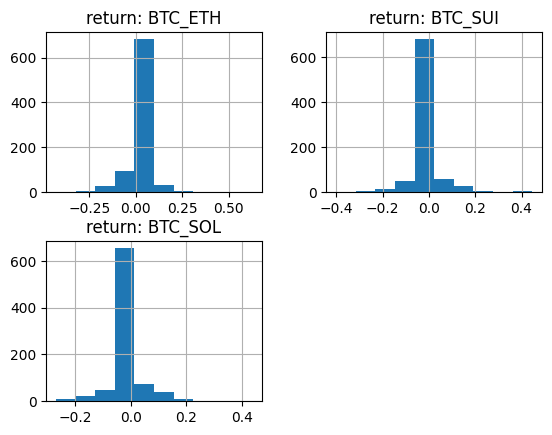

In [11]:
c.returns.hist()

<Axes: xlabel='datetime'>

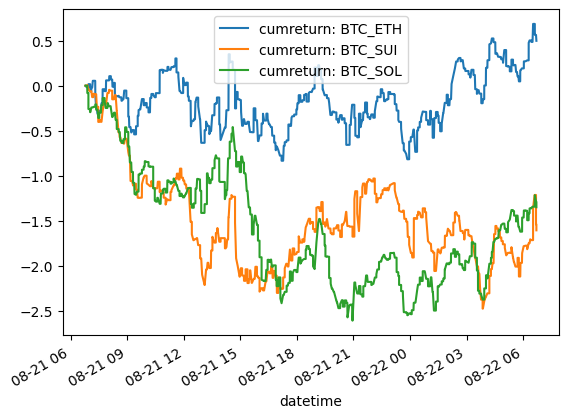

In [5]:
c.cumreturns.plot()

In [ ]:
c.df

In [43]:
prices = get_prices(tickers_crypto=['ETH', 'SUI', 'SOL'], ticker_fiat='BTC', days='1D')
prices = prices.ffill().dropna()
mapping_rename = {col: col.split(': prices')[0] for col in prices.columns}
prices = prices.rename(columns=mapping_rename)
prices

prices.plot()

HTTPError: 400 Client Error: Bad Request for url: https://api.coingecko.com/api/v3/coins/ethereum/market_chart?vs_currency=bitcoin&days=1D

In [38]:
tm = TimeseriesMatrix(df=prices)
tm

In [39]:
tm.df

,USD_SUI,USD_BTC,USD_ETH
datetime,,,
2025-08-21 06:22:05.744000+00:00,3.507390,113645.436427,4289.191806
2025-08-21 06:25:18.218000+00:00,3.505915,113645.436427,4289.191806
2025-08-21 06:25:44.277000+00:00,3.505915,113616.899101,4289.191806
2025-08-21 06:25:44.521000+00:00,3.505915,113616.899101,4286.576004
2025-08-21 06:31:11.872000+00:00,3.505915,113613.279203,4286.576004
...,...,...,...
2025-08-22 06:17:54.501000+00:00,3.437894,113272.481505,4293.484306
2025-08-22 06:17:54.949000+00:00,3.437894,113272.481505,4304.294024
2025-08-22 06:18:33+00:00,3.437894,113268.303492,4304.294024


In [40]:
cumreturns = tm.cumreturns
cumreturns

,cumreturn: USD_SUI,cumreturn: USD_BTC,cumreturn: USD_ETH
datetime,,,
2025-08-21 06:22:05.744000+00:00,0.000000,0.000000,0.000000
2025-08-21 06:25:18.218000+00:00,-0.042051,0.000000,0.000000
2025-08-21 06:25:44.277000+00:00,-0.042051,-0.025111,0.000000
2025-08-21 06:25:44.521000+00:00,-0.042051,-0.025111,-0.060986
2025-08-21 06:31:11.872000+00:00,-0.042051,-0.028296,-0.060986
...,...,...,...
2025-08-22 06:17:54.501000+00:00,-1.981409,-0.328174,0.100077
2025-08-22 06:17:54.949000+00:00,-1.981409,-0.328174,0.352099
2025-08-22 06:18:33+00:00,-1.981409,-0.331850,0.352099


<Axes: xlabel='datetime'>

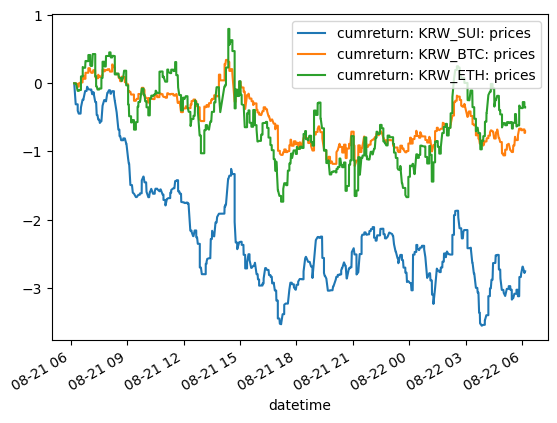

In [24]:
cumreturns.plot()

In [8]:
perf = Performance(timeseries=prices)
perf

ValueError: Invalid date format or invalid date range: unconverted data remains:  06:02:32.923000+00:00

<Axes: xlabel='datetime'>

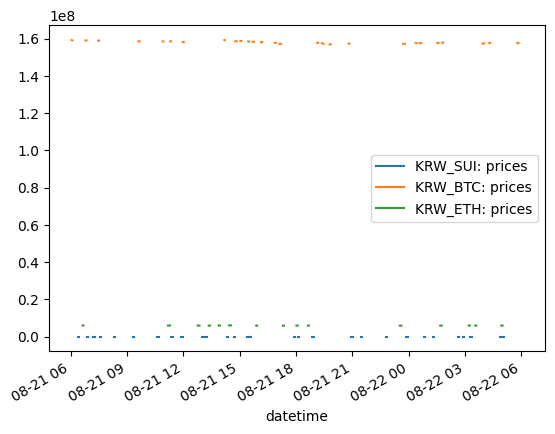

In [5]:
prices.plot()

In [2]:
get_triple(ticker_crypto='SUI', ticker_fiat='KRW', days='1D')

Transformed timeseries to <class 'pandas._libs.tslibs.timestamps.Timestamp'> index
Transformed timeseries to <class 'pandas._libs.tslibs.timestamps.Timestamp'> index
Transformed timeseries to <class 'pandas._libs.tslibs.timestamps.Timestamp'> index


,KRW_SUI: prices,KRW_SUI: market_caps,KRW_SUI: total_volumes
datetime,,,
2025-08-21 05:50:37.635000+00:00,4940.006199,1.732834e+13,1.876288e+12
2025-08-21 05:55:50.987000+00:00,4944.303945,1.735077e+13,1.873415e+12
2025-08-21 06:01:54.700000+00:00,4947.091227,1.736337e+13,1.749156e+12
2025-08-21 06:07:49.397000+00:00,4945.692026,1.737269e+13,9.737481e+11
2025-08-21 06:10:41.799000+00:00,4919.954352,1.737269e+13,1.872079e+12
...,...,...,...
2025-08-22 05:30:50.313000+00:00,4764.994860,1.672975e+13,1.410865e+12
2025-08-22 05:35:43.396000+00:00,4768.116224,1.673969e+13,1.360360e+12
2025-08-22 05:42:28.880000+00:00,4770.998773,1.676283e+13,1.415347e+12


In [4]:
sui = get_single(ticker_crypto='SUI', ticker_fiat='KRW', field='prices', days='1D')
btc = get_single(ticker_crypto='BTC', ticker_fiat='KRW', field='prices', days='1D')
eth = get_single(ticker_crypto='ETH', ticker_fiat='KRW', field='prices', days='1D')

sui.join(btc, how='outer').join(eth, how='outer')

Transformed timeseries to <class 'pandas._libs.tslibs.timestamps.Timestamp'> index
Transformed timeseries to <class 'pandas._libs.tslibs.timestamps.Timestamp'> index
Transformed timeseries to <class 'pandas._libs.tslibs.timestamps.Timestamp'> index


,KRW_SUI: prices,KRW_BTC: prices,KRW_ETH: prices
datetime,,,
2025-08-21 05:50:37.635000+00:00,4940.006199,NaN,NaN
2025-08-21 05:55:50.987000+00:00,4944.303945,NaN,NaN
2025-08-21 05:56:21.879000+00:00,NaN,1.593741e+08,NaN
2025-08-21 05:56:23.242000+00:00,NaN,NaN,6.037064e+06
2025-08-21 06:01:54.700000+00:00,4947.091227,NaN,NaN
...,...,...,...
2025-08-22 05:47:02.116000+00:00,NaN,1.576371e+08,NaN
2025-08-22 05:51:02.035000+00:00,NaN,1.577937e+08,NaN
2025-08-22 05:51:03+00:00,4776.359802,NaN,NaN


In [4]:
df = map_id_to_transformed_timeseries('sui', 'krw', '1D')
df

Transformed timeseries to <class 'pandas._libs.tslibs.timestamps.Timestamp'> index
Transformed timeseries to <class 'pandas._libs.tslibs.timestamps.Timestamp'> index
Transformed timeseries to <class 'pandas._libs.tslibs.timestamps.Timestamp'> index


,prices,market_caps,total_volumes
datetime,,,
2025-08-21 05:50:37.635000+00:00,4940.006199,1.732834e+13,1.876288e+12
2025-08-21 05:55:50.987000+00:00,4944.303945,1.735077e+13,1.873415e+12
2025-08-21 06:01:54.700000+00:00,4947.091227,1.736337e+13,1.749156e+12
2025-08-21 06:07:49.397000+00:00,4945.692026,1.737269e+13,9.737481e+11
2025-08-21 06:10:41.799000+00:00,4919.954352,1.737269e+13,1.872079e+12
...,...,...,...
2025-08-22 05:30:50.313000+00:00,4764.994860,1.672975e+13,1.410865e+12
2025-08-22 05:35:43.396000+00:00,4768.116224,1.673969e+13,1.360360e+12
2025-08-22 05:42:28.880000+00:00,4770.998773,1.676283e+13,1.415347e+12


In [6]:
mapping_rename = {col: get_canonical_column_name(ticker_fiat='USD', ticker_crypto='SUI', field=col) for col in df.columns}
mapping_rename

{'prices': 'USD_SUI: prices',
 'market_caps': 'USD_SUI: market_caps',
 'total_volumes': 'USD_SUI: total_volumes'}

In [ ]:
map_id_to_transformed_timeseries('sui', 'krw', '1D')

Transformed timeseries to <class 'pandas._libs.tslibs.timestamps.Timestamp'> index
Transformed timeseries to <class 'pandas._libs.tslibs.timestamps.Timestamp'> index
Transformed timeseries to <class 'pandas._libs.tslibs.timestamps.Timestamp'> index


,prices,market_caps,total_volumes
datetime,,,
2025-08-21 05:23:03.216000+00:00,4929.358084,1.731669e+13,1.804880e+12
2025-08-21 05:27:46.066000+00:00,4929.692127,1.731406e+13,1.861727e+12
2025-08-21 05:32:37.629000+00:00,4924.942726,1.729099e+13,1.860442e+12
2025-08-21 05:36:36.935000+00:00,4934.430250,1.729099e+13,1.877379e+12
2025-08-21 05:41:37.787000+00:00,4933.133503,1.733054e+13,1.876786e+12
...,...,...,...
2025-08-22 05:01:51.382000+00:00,4768.686869,1.674494e+13,1.410490e+12
2025-08-22 05:06:02.950000+00:00,4766.505909,1.674519e+13,1.409009e+12
2025-08-22 05:11:32.692000+00:00,4771.621231,1.675308e+13,1.412914e+12


In [ ]:
coin_id = 'sui'
vs_currency = 'krw'
days = '1D'

data = fetch_data_market_chart(coin_id, vs_currency, days)
prices = data['prices']
caps = data['market_caps']
volumes = data['total_volumes']


[[1755753783216, 17316689217497.598],
 [1755754066066, 17314061158038.455],
 [1755754357629, 17290994434922.697],
 [1755754596935, 17290994434922.697],
 [1755754897787, 17330536086448.467],
 [1755755201654, 17328335871536.213],
 [1755755437635, 17328335871536.213],
 [1755755750987, 17350773499702.586],
 [1755756114700, 17363374556706.799],
 [1755756469397, 17372691734625.908],
 [1755756641799, 17372691734625.908],
 [1755756940188, 17372691734625.908],
 [1755757325744, 17372691734625.908],
 [1755757518218, 17203761698674.924],
 [1755757939580, 17203761698674.924],
 [1755758248932, 17217532347510.117],
 [1755758440448, 17239801330114.785],
 [1755758745497, 17239801330114.785],
 [1755759129704, 17263351835674.428],
 [1755759353377, 17265257657492.654],
 [1755759646080, 17265257657492.654],
 [1755760084165, 17258110015541.283],
 [1755760335076, 17257489716525.05],
 [1755760662455, 17243623564327.19],
 [1755760964168, 17243623564327.19],
 [1755761246194, 17197160722807.775],
 [1755761563220

In [18]:
get_btcsui_1d()
get_krwsui_1d()
get_usdsui_1d()

Transformed timeseries to <class 'pandas._libs.tslibs.timestamps.Timestamp'> index
Transformed timeseries to <class 'pandas._libs.tslibs.timestamps.Timestamp'> index
Transformed timeseries to <class 'pandas._libs.tslibs.timestamps.Timestamp'> index


,prices
datetime,
2025-08-21 05:12:20.781000+00:00,3.524116
2025-08-21 05:16:36.756000+00:00,3.524522
2025-08-21 05:23:03.216000+00:00,3.524075
2025-08-21 05:27:46.066000+00:00,3.524616
2025-08-21 05:32:37.629000+00:00,3.526843
...,...
2025-08-22 04:51:11.853000+00:00,3.429176
2025-08-22 04:55:34.870000+00:00,3.423499
2025-08-22 05:01:51.382000+00:00,3.422045


In [7]:
COINGECKO_FILEDS.values()

dict_values(['prices', 'market_caps', 'total_volumes'])

In [9]:
COINGECKO_DAYS_OPTIONS.keys()

dict_keys(['1D', '7D', '14D', '30D', '90D', '180D', '1Y', 'MAX'])

In [14]:
get_timeseries_crypto(coin_id='bitcoin', field='market_caps', vs_currency='krw', days='7D')

Transformed timeseries to <class 'pandas._libs.tslibs.timestamps.Timestamp'> index


,market_caps
datetime,
2025-08-15 05:03:19.015000+00:00,3.289452e+15
2025-08-15 06:01:35.001000+00:00,3.285582e+15
2025-08-15 07:02:27.043000+00:00,3.295366e+15
2025-08-15 08:03:03.800000+00:00,3.287191e+15
2025-08-15 09:03:08.736000+00:00,3.286828e+15
...,...
2025-08-22 01:02:36.235000+00:00,3.137059e+15
2025-08-22 02:01:26.472000+00:00,3.142750e+15
2025-08-22 03:01:24.381000+00:00,3.154510e+15


In [2]:
get_timeseries_crypto(coin_id='bitcoin', field='prices', vs_currency='usd', days='1')

Transformed timeseries to <class 'pandas._libs.tslibs.timestamps.Timestamp'> index


,prices
datetime,
2025-08-21 05:01:33.362000+00:00,113808.264213
2025-08-21 05:07:16.574000+00:00,113713.541865
2025-08-21 05:12:36.152000+00:00,113659.052946
2025-08-21 05:16:21.588000+00:00,113701.443365
2025-08-21 05:21:44.023000+00:00,113741.461061
...,...
2025-08-22 04:36:54.632000+00:00,113067.106542
2025-08-22 04:40:41.336000+00:00,113101.885270
2025-08-22 04:45:41.407000+00:00,113044.795424


In [2]:
# get_usdbtc(days='1')
get_usdbtc_minutely(days='1')

HTTPError: 401 Client Error: Unauthorized for url: https://api.coingecko.com/api/v3/coins/bitcoin/market_chart/range?vs_currency=usd&days=1&interval=5m

In [7]:
get_range_timeseries_bitcoin_minutely()

TypeError: map_id_and_field_to_transformed_timeseries() got an unexpected keyword argument 'interval'

In [5]:
map_id_and_field_to_transformed_timeseries(coin_id='ethereum', field='prices', vs_currency='eth', days=1)

Transformed timeseries to <class 'pandas._libs.tslibs.timestamps.Timestamp'> index


,prices
datetime,
2025-08-21 04:35:32.924000+00:00,1.0
2025-08-21 04:41:28.559000+00:00,1.0
2025-08-21 04:47:12.133000+00:00,1.0
2025-08-21 04:52:33.620000+00:00,1.0
2025-08-21 04:55:24.022000+00:00,1.0
...,...
2025-08-22 04:20:32.687000+00:00,1.0
2025-08-22 04:26:04.045000+00:00,1.0
2025-08-22 04:31:45.769000+00:00,1.0


In [2]:
get_timeseries_usdbtc(days=1)

Transformed timeseries to <class 'pandas._libs.tslibs.timestamps.Timestamp'> index


,prices
datetime,
2025-08-21 04:35:31.835000+00:00,113978.814172
2025-08-21 04:41:12.804000+00:00,113843.297145
2025-08-21 04:46:52.502000+00:00,113883.117622
2025-08-21 04:52:34.124000+00:00,113926.157764
2025-08-21 04:55:23.216000+00:00,113875.278784
...,...
2025-08-22 04:17:51.906000+00:00,113115.209171
2025-08-22 04:20:32.193000+00:00,113173.007894
2025-08-22 04:26:01.335000+00:00,113133.960174


In [4]:
data = get_coin_list()

In [6]:
df = pd.DataFrame(data)
df

,id,symbol,name
0,_,gib,༼ つ ◕_◕ ༽つ
1,000-capital,000,000 Capital
2,01111010011110000110001001110100-token,01111010011110000110001001110100,01111010011110000110001001110100
3,0chain,zcn,Zus
4,0dog,0dog,Bitcoin Dogs
...,...,...,...
18258,zygo-the-frog,zygo,Zygo The Frog
18259,zyncoin-2,zyn,ZynCoin
18260,zynecoin,zyn,Zynecoin
18261,zyro-2,zyro,ZYRO


In [9]:
data = get_bitcoin_market_chart(vs_currency='usd', days=1)
data

{'prices': [[1755749481982, 113897.83266230627],
  [1755749864101, 113884.27115342258],
  [1755750099272, 113907.41766963653],
  [1755750415250, 113881.12887468259],
  [1755750748276, 113914.57042067562],
  [1755750931835, 113978.81417175855],
  [1755751272804, 113843.29714525594],
  [1755751612502, 113883.11762220431],
  [1755751954124, 113926.1577635191],
  [1755752123216, 113875.2787841201],
  [1755752493362, 113808.26421295329],
  [1755752836574, 113713.54186526407],
  [1755753156152, 113659.05294578259],
  [1755753381588, 113701.44336490911],
  [1755753704023, 113741.46106132481],
  [1755754051591, 113789.00961898005],
  [1755754242773, 113750.59456797718],
  [1755754592562, 113836.3523265364],
  [1755754902816, 113830.82157255549],
  [1755755252218, 113897.2624963583],
  [1755755431916, 113916.98900504554],
  [1755755781879, 113954.38733064673],
  [1755756152923, 113939.39038609476],
  [1755756302844, 113852.7262326036],
  [1755756654273, 113639.77482493184],
  [1755756994827, 11

In [ ]:
from functools import partial
import requests
import pandas as pd
from universal_timeseries_transformer import transform_timeseries

In [7]:
# https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=30
COIN_GECKO_API_URL = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"

In [21]:
COINGECKO_API_BASE_URL = "https://api.coingecko.com/api/v3/coins"

def build_coingecko_url(coin_id, resource):
    return f"{COINGECKO_API_BASE_URL}/{coin_id}/{resource}"

def build_api_params(vs_currency, days):
    return {
        "vs_currency": vs_currency,
        "days": days
    }

def get_coingecko_list_url():
    return f"{COINGECKO_API_BASE_URL}/list"

In [ ]:
# import json
# from datetime import datetime

url = COIN_GECKO_API_URL


params = {
    "vs_currency": "usd",
    "days": "30"
}

response = requests.get(url, params=params)
response.raise_for_status()  # HTTP 오류 체크
    
data = response.json()
data

{'prices': [[1753175010521, 118278.90794993407],
  [1753178640117, 118467.36885600089],
  [1753182191591, 118785.81023179082],
  [1753185898429, 119182.68891245346],
  [1753189494311, 119359.72945155788],
  [1753193165038, 118703.26838071554],
  [1753196904039, 119002.50760809887],
  [1753200557180, 119010.09713031474],
  [1753204068147, 118754.69781442013],
  [1753207731196, 119184.9420945347],
  [1753211082563, 119733.93468019101],
  [1753214734817, 119302.45718960169],
  [1753218500996, 119759.51655055693],
  [1753222129749, 119647.13610350236],
  [1753225447098, 119905.34412932584],
  [1753229080480, 119958.86217219132],
  [1753232769683, 119683.19953786394],
  [1753236029496, 119583.73597101556],
  [1753239787978, 119127.28034544508],
  [1753243445556, 118687.14241553268],
  [1753247314993, 118900.1656138629],
  [1753250916877, 118701.95317626116],
  [1753254236433, 118473.90255623346],
  [1753258105507, 118379.73883290826],
  [1753261746854, 118433.78513026409],
  [1753265319482,

In [ ]:
import requests
import pandas as pd

COINGECKO_API = "https://api.coingecko.com/api/v3/coins/list"

resp = requests.get(COINGECKO_API)
resp.raise_for_status()
coins = resp.json()

# coins 는 [{"id": "bitcoin", "symbol": "btc", "name": "Bitcoin"}, ...] 형태
print(len(coins))         # 전체 코인 개수
print(coins[:5])            # 앞에서 5개만 출력

18254
[{'id': '_', 'symbol': 'gib', 'name': '༼ つ ◕_◕ ༽つ'}, {'id': '000-capital', 'symbol': '000', 'name': '000 Capital'}, {'id': '01111010011110000110001001110100-token', 'symbol': '01111010011110000110001001110100', 'name': '01111010011110000110001001110100'}, {'id': '0chain', 'symbol': 'zcn', 'name': 'Zus'}, {'id': '0dog', 'symbol': '0dog', 'name': 'Bitcoin Dogs'}]


In [10]:
df = pd.DataFrame(data['prices']).rename(columns={0: 'timestamp', 1: 'price'}).set_index('timestamp')
df = transform_timeseries(df, option_type='datetime')
df

Transformed timeseries to <class 'pandas._libs.tslibs.timestamps.Timestamp'> index


,price
datetime,
2025-07-22 09:03:30.521000+00:00,118278.907950
2025-07-22 10:04:00.117000+00:00,118467.368856
2025-07-22 11:03:11.591000+00:00,118785.810232
2025-07-22 12:04:58.429000+00:00,119182.688912
2025-07-22 13:04:54.311000+00:00,119359.729452
...,...
2025-08-21 05:02:02.324000+00:00,113808.264213
2025-08-21 06:02:33.048000+00:00,113954.387331
2025-08-21 07:02:15.544000+00:00,113737.028122


<Axes: xlabel='datetime'>

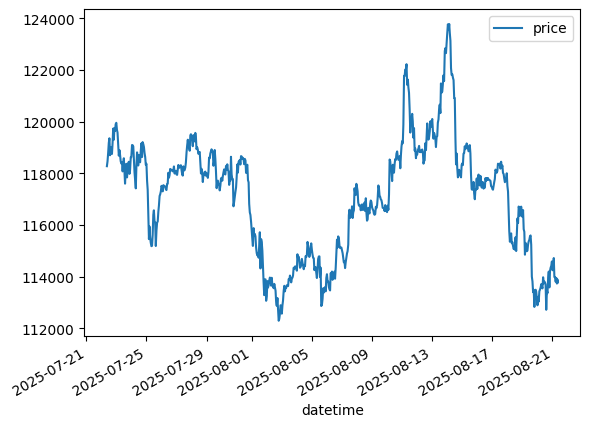

In [11]:
df.plot()

In [16]:
df_day = df.resample("1W").last()
df_day

,price
datetime,
2025-07-27 00:00:00+00:00,119516.242626
2025-08-03 00:00:00+00:00,114319.437991
2025-08-10 00:00:00+00:00,119034.739530
2025-08-17 00:00:00+00:00,118004.768689
2025-08-24 00:00:00+00:00,113778.938314


In [17]:
df_str = transform_timeseries(df_day, option_type='str')
df_str

Transformed timeseries to <class 'str'> index


,price
date,
2025-07-27,119516.242626
2025-08-03,114319.437991
2025-08-10,119034.739530
2025-08-17,118004.768689
2025-08-24,113778.938314


<Axes: xlabel='date'>

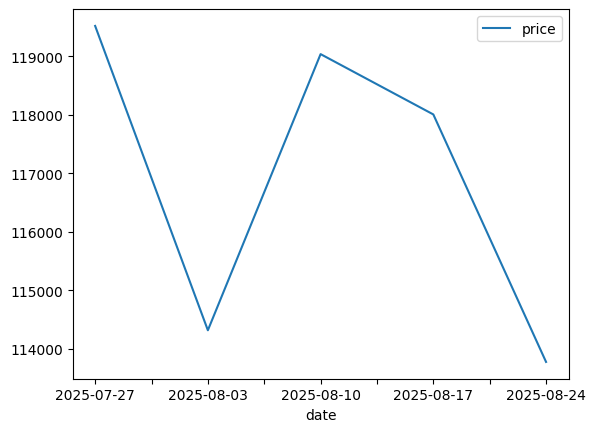

In [18]:
df_str.plot()

Transformed timeseries to <class 'pandas._libs.tslibs.timestamps.Timestamp'> index


,price
datetime,
2025-07-22 09:03:30.521000+00:00,118278.907950
2025-07-22 10:04:00.117000+00:00,118467.368856
2025-07-22 11:03:11.591000+00:00,118785.810232
2025-07-22 12:04:58.429000+00:00,119182.688912
2025-07-22 13:04:54.311000+00:00,119359.729452
...,...
2025-08-21 05:02:02.324000+00:00,113808.264213
2025-08-21 06:02:33.048000+00:00,113954.387331
2025-08-21 07:02:15.544000+00:00,113737.028122


In [7]:
df.index

Index([1753171410325, 1753175010521, 1753178640117, 1753182191591,
       1753185898429, 1753189494311, 1753193165038, 1753196904039,
       1753200557180, 1753204068147,
       ...
       1755730922274, 1755734502284, 1755738139563, 1755741727089,
       1755745272204, 1755748891792, 1755752522324, 1755756153048,
       1755759735544, 1755763400000],
      dtype='int64', name='timestamp', length=722)

In [9]:
df_trfd = transform_timeseries(timeseries=df, option_type='datetime')
df_trfd

Transformed timeseries to <class 'pandas._libs.tslibs.timestamps.Timestamp'> index


,price
datetime,
2025-07-22 08:03:30.325000+00:00,118027.162284
2025-07-22 09:03:30.521000+00:00,118278.907950
2025-07-22 10:04:00.117000+00:00,118467.368856
2025-07-22 11:03:11.591000+00:00,118785.810232
2025-07-22 12:04:58.429000+00:00,119182.688912
...,...
2025-08-21 04:01:31.792000+00:00,113987.133929
2025-08-21 05:02:02.324000+00:00,113808.264213
2025-08-21 06:02:33.048000+00:00,113954.387331


In [28]:
map_unix_timestamps_to_datetimes(df.index)

DatetimeIndex(['2025-07-22 08:03:30.325000+00:00',
               '2025-07-22 09:03:30.521000+00:00',
               '2025-07-22 10:04:00.117000+00:00',
               '2025-07-22 11:03:11.591000+00:00',
               '2025-07-22 12:04:58.429000+00:00',
               '2025-07-22 13:04:54.311000+00:00',
               '2025-07-22 14:06:05.038000+00:00',
               '2025-07-22 15:08:24.039000+00:00',
               '2025-07-22 16:09:17.180000+00:00',
               '2025-07-22 17:07:48.147000+00:00',
               ...
               '2025-08-20 23:02:02.274000+00:00',
               '2025-08-21 00:01:42.284000+00:00',
               '2025-08-21 01:02:19.563000+00:00',
               '2025-08-21 02:02:07.089000+00:00',
               '2025-08-21 03:01:12.204000+00:00',
               '2025-08-21 04:01:31.792000+00:00',
               '2025-08-21 05:02:02.324000+00:00',
               '2025-08-21 06:02:33.048000+00:00',
               '2025-08-21 07:02:15.544000+00:00',
            

In [10]:
df_trfd.index

DatetimeIndex(['2025-07-22 08:03:30.325000+00:00',
               '2025-07-22 09:03:30.521000+00:00',
               '2025-07-22 10:04:00.117000+00:00',
               '2025-07-22 11:03:11.591000+00:00',
               '2025-07-22 12:04:58.429000+00:00',
               '2025-07-22 13:04:54.311000+00:00',
               '2025-07-22 14:06:05.038000+00:00',
               '2025-07-22 15:08:24.039000+00:00',
               '2025-07-22 16:09:17.180000+00:00',
               '2025-07-22 17:07:48.147000+00:00',
               ...
               '2025-08-20 23:02:02.274000+00:00',
               '2025-08-21 00:01:42.284000+00:00',
               '2025-08-21 01:02:19.563000+00:00',
               '2025-08-21 02:02:07.089000+00:00',
               '2025-08-21 03:01:12.204000+00:00',
               '2025-08-21 04:01:31.792000+00:00',
               '2025-08-21 05:02:02.324000+00:00',
               '2025-08-21 06:02:33.048000+00:00',
               '2025-08-21 07:02:15.544000+00:00',
            

In [8]:
map_unix_timestamps_to_datetimes(df.index.to_list())

DatetimeIndex(['1970-01-01 00:29:13.171410325',
               '1970-01-01 00:29:13.175010521',
               '1970-01-01 00:29:13.178640117',
               '1970-01-01 00:29:13.182191591',
               '1970-01-01 00:29:13.185898429',
               '1970-01-01 00:29:13.189494311',
               '1970-01-01 00:29:13.193165038',
               '1970-01-01 00:29:13.196904039',
               '1970-01-01 00:29:13.200557180',
               '1970-01-01 00:29:13.204068147',
               ...
               '1970-01-01 00:29:15.730922274',
               '1970-01-01 00:29:15.734502284',
               '1970-01-01 00:29:15.738139563',
               '1970-01-01 00:29:15.741727089',
               '1970-01-01 00:29:15.745272204',
               '1970-01-01 00:29:15.748891792',
               '1970-01-01 00:29:15.752522324',
               '1970-01-01 00:29:15.756153048',
               '1970-01-01 00:29:15.759735544',
                  '1970-01-01 00:29:15.761843'],
              dtype=

In [ ]:
GET https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=30

In [1]:
import requests
import json
from datetime import datetime

def get_bitcoin_market_data():
    url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"
    params = {
        "vs_currency": "usd",
        "days": "30"
    }
    
    try:
        response = requests.get(url, params=params)
        response.raise_for_status()  # HTTP 오류 체크
        
        data = response.json()
        
        # 데이터 구조 확인
        print("데이터 키:", list(data.keys()))
        print(f"가격 데이터 개수: {len(data['prices'])}")
        print(f"거래량 데이터 개수: {len(data['total_volumes'])}")
        print(f"시가총액 데이터 개수: {len(data['market_caps'])}")
        
        # 최신 데이터 출력
        if data['prices']:
            latest_price = data['prices'][-1]
            timestamp = datetime.fromtimestamp(latest_price[0] / 1000)
            price = latest_price[1]
            print(f"\n최신 데이터:")
            print(f"시간: {timestamp}")
            print(f"가격: ${price:,.2f}")
        
        return data
        
    except requests.exceptions.RequestException as e:
        print(f"API 요청 오류: {e}")
        return None
    except json.JSONDecodeError as e:
        print(f"JSON 파싱 오류: {e}")
        return None
    except Exception as e:
        print(f"예상치 못한 오류: {e}")
        return None

# 함수 실행
if __name__ == "__main__":
    bitcoin_data = get_bitcoin_market_data()
    
    if bitcoin_data:
        print("\n=== 전체 데이터 구조 ===")
        print(json.dumps(bitcoin_data, indent=2)[:1000] + "...")  # 처음 1000자만 출력

데이터 키: ['prices', 'market_caps', 'total_volumes']
가격 데이터 개수: 722
거래량 데이터 개수: 722
시가총액 데이터 개수: 722

최신 데이터:
시간: 2025-08-21 10:52:52
가격: $114,411.72

=== 전체 데이터 구조 ===
{
  "prices": [
    [
      1753149841280,
      117844.24056015006
    ],
    [
      1753153341826,
      117174.28039401122
    ],
    [
      1753157050930,
      117225.52740208808
    ],
    [
      1753160636905,
      116847.62908057561
    ],
    [
      1753164221915,
      117294.80043308112
    ],
    [
      1753167818661,
      117771.31657343563
    ],
    [
      1753171410325,
      118027.16228387582
    ],
    [
      1753175010521,
      118278.90794993407
    ],
    [
      1753178640117,
      118467.36885600089
    ],
    [
      1753182191591,
      118785.81023179082
    ],
    [
      1753185898429,
      119182.68891245346
    ],
    [
      1753189494311,
      119359.72945155788
    ],
    [
      1753193165038,
      118703.26838071554
    ],
    [
      1753196904039,
      119002.50760809887